In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [4]:
# Load the dataset
df=pd.read_csv("C:/Users/Ryzen/Downloads/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
df.shape

(7043, 21)

In [8]:
df. columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
from sklearn.preprocessing import LabelEncoder

# Select only categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Loop through each categorical column and convert to numeric
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Display the converted DataFrame
print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   


In [19]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

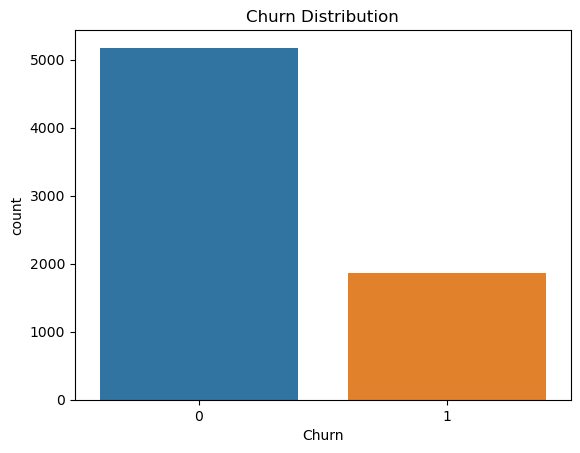

In [21]:
# Plot churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


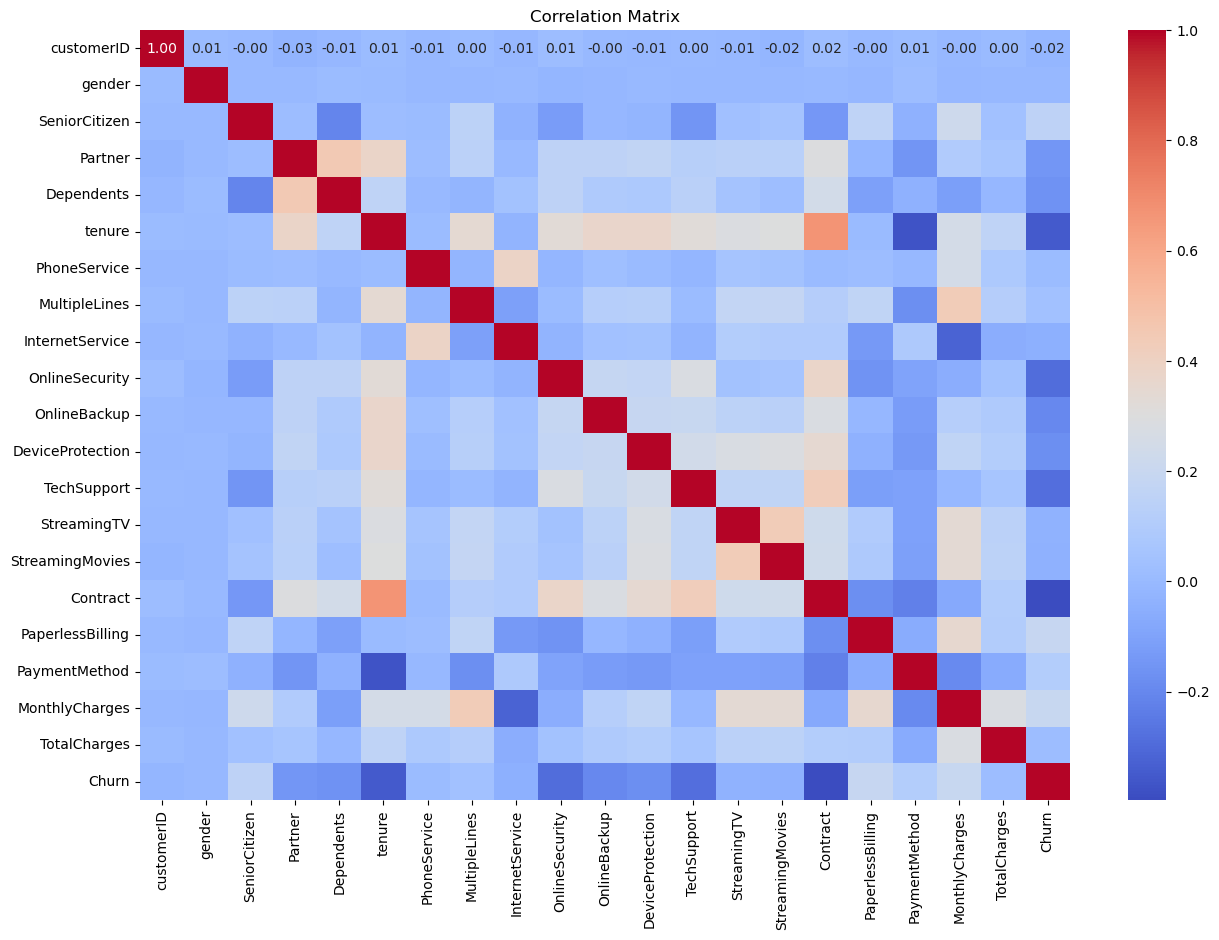

In [22]:
# Visualize the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

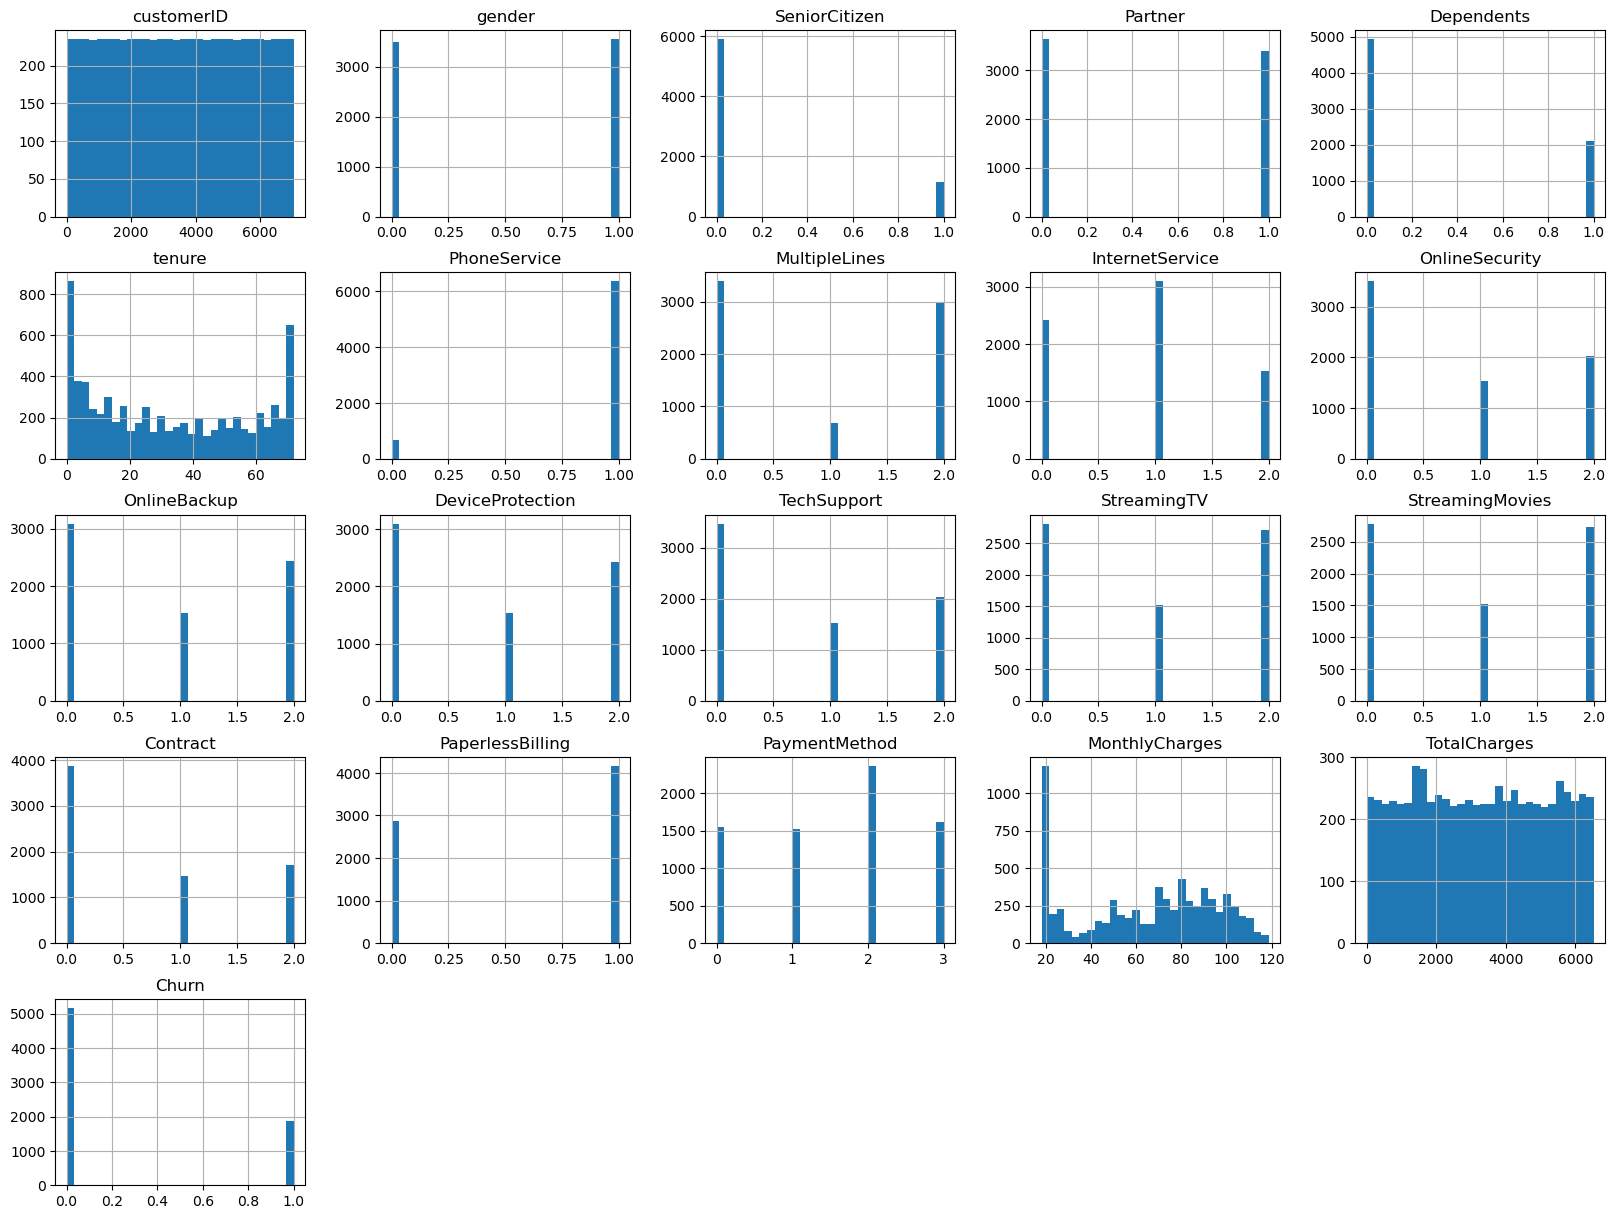

In [23]:
# Visualize distribution of numerical features
df.hist(bins=30, figsize=(20, 15))
plt.show()

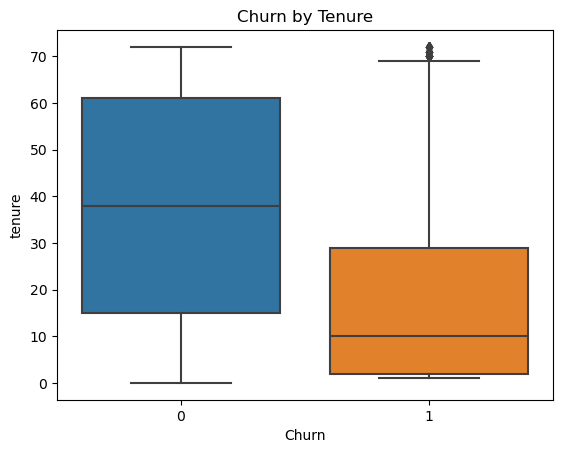

In [24]:
# Visualize churn by tenure
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Churn by Tenure')
plt.show()

In [25]:
# Feature Engineering
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)


In [26]:
# Scale numerical features
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Split data into features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

In [27]:
#Building the Churn Prediction Model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [29]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [30]:
# Evaluate the models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)
rf_metrics = evaluate_model(y_test, y_pred_rf)

print(f"Logistic Regression Metrics: Accuracy: {log_reg_metrics[0]:.2f}, Precision: {log_reg_metrics[1]:.2f}, Recall: {log_reg_metrics[2]:.2f}, F1 Score: {log_reg_metrics[3]:.2f}")
print(f"Random Forest Metrics: Accuracy: {rf_metrics[0]:.2f}, Precision: {rf_metrics[1]:.2f}, Recall: {rf_metrics[2]:.2f}, F1 Score: {rf_metrics[3]:.2f}")

print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Metrics: Accuracy: 0.82, Precision: 0.69, Recall: 0.57, F1 Score: 0.62
Random Forest Metrics: Accuracy: 0.80, Precision: 0.66, Recall: 0.48, F1 Score: 0.55

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [31]:
#Model Evaluation
# Logistic Regression Evaluation
print("Logistic Regression Evaluation")
print(f"Accuracy: {log_reg_metrics[0]:.2f}")
print(f"Precision: {log_reg_metrics[1]:.2f}")
print(f"Recall: {log_reg_metrics[2]:.2f}")
print(f"F1 Score: {log_reg_metrics[3]:.2f}")


Logistic Regression Evaluation
Accuracy: 0.82
Precision: 0.69
Recall: 0.57
F1 Score: 0.62


In [32]:
# Random Forest Evaluation
print("\nRandom Forest Evaluation")
print(f"Accuracy: {rf_metrics[0]:.2f}")
print(f"Precision: {rf_metrics[1]:.2f}")
print(f"Recall: {rf_metrics[2]:.2f}")
print(f"F1 Score: {rf_metrics[3]:.2f}")


Random Forest Evaluation
Accuracy: 0.80
Precision: 0.66
Recall: 0.48
F1 Score: 0.55


Documentation and Reporting:
""" In order to facilitate machine learning model compatibility, we used a Label Encoding model to convert categorical data into numeric representation during the project. Important findings from the exploratory data analysis (EDA) included the following: the dataset had 21 columns and 7043 entries, and the churn rate differed considerably depending on the customer's demographics and service consumption habits. Using LabelEncoder, feature engineers converted numeric values from categorical categories like gender, InternetService, and PaymentMethod. Our review of our preprocessing revealed that we could effectively apply a wide range of machine-learning methods if we converted these features. Managing categorical data effectively was one of the challenges faced, although it was lessened by methodically encoding each category column. All things considered, this preprocessing stage was essential to getting the data ready for additional modeling and analysis."""
